In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('yt performance analytics.csv')

# Display the first 5 rows
print(df.head())

   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

In [2]:
print(df.shape)  # Shows (rows, columns)

(364, 70)


In [3]:
print(df.columns)

Index(['ID', 'Video Duration', 'Video Publish Time', 'Days Since Publish',
       'Day', 'Month', 'Year', 'Day of Week', 'Revenue per 1000 Views (USD)',
       'Monetized Playbacks (Estimate)', 'Playback-Based CPM (USD)',
       'CPM (USD)', 'Ad Impressions', 'Estimated AdSense Revenue (USD)',
       'DoubleClick Revenue (USD)', 'YouTube Ads Revenue (USD)',
       'Watch Page Ads Revenue (USD)', 'YouTube Premium (USD)',
       'Transaction Revenue (USD)', 'Transactions',
       'Revenue from Transactions (USD)', 'Reactions', 'Chat Messages Count',
       'Reminders Set', 'Stream Hours', 'Remix Views', 'Remix Count',
       'Subscribers from Posts', 'New Comments', 'Shares', 'Like Rate (%)',
       'Dislikes', 'Likes', 'Unsubscribes', 'New Subscribers',
       'Returned Items (USD)', 'Unconfirmed Commissions (USD)',
       'Approved Commissions (USD)', 'Orders', 'Total Sales Volume (USD)',
       'End Screen Click-Through Rate (%)', 'End Screen Impressions',
       'End Screen Clicks', 

In [4]:
print(df.info())  # Shows data types and missing values
print(df.describe())  # Shows stats like average, min, max for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [5]:
print(df.isnull().sum())  # Shows how many missing values per column

ID                         0
Video Duration             0
Video Publish Time         0
Days Since Publish         0
Day                        0
                          ..
Watch Time (hours)         0
Subscribers                0
Estimated Revenue (USD)    0
Impressions                0
Video Thumbnail CTR (%)    0
Length: 70, dtype: int64


In [7]:
# Fill missing numeric values with 0
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(0)

In [8]:
df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  364 non-null    int64         
 1   Video Duration                      364 non-null    float64       
 2   Video Publish Time                  364 non-null    datetime64[ns]
 3   Days Since Publish                  364 non-null    int64         
 4   Day                                 364 non-null    int64         
 5   Month                               364 non-null    int64         
 6   Year                                364 non-null    int64         
 7   Day of Week                         364 non-null    object        
 8   Revenue per 1000 Views (USD)        364 non-null    float64       
 9   Monetized Playbacks (Estimate)      364 non-null    float64       
 10  Playback-Based CPM (USD)  

In [10]:
print(df.duplicated().sum())  # Shows number of duplicate rows

0


In [11]:
key_columns = [
    'Video Duration', 'Video Publish Time', 'Day of Week', 'Views',
    'Estimated Revenue (USD)', 'Likes', 'Dislikes', 'Shares', 'New Subscribers',
    'Average View Percentage (%)', 'Video Thumbnail CTR (%)'
]
df = df[key_columns]
print(df.head())

   Video Duration Video Publish Time Day of Week    Views  \
0           201.0         2016-06-02    Thursday  23531.0   
1           391.0         2016-06-10      Friday  11478.0   
2           133.0         2016-06-14     Tuesday   6153.0   
3            14.0         2016-06-29   Wednesday   4398.0   
4            45.0         2016-07-01      Friday  14659.0   

   Estimated Revenue (USD)  Likes  Dislikes  Shares  New Subscribers  \
0                    0.561  924.0      30.0    12.0             54.0   
1                    0.648  322.0      18.0     5.0             34.0   
2                    0.089  239.0      20.0     4.0              8.0   
3                    0.017  220.0      14.0     7.0              2.0   
4                    0.000  602.0     180.0     7.0             31.0   

   Average View Percentage (%)  Video Thumbnail CTR (%)  
0                        40.38                    27.66  
1                        39.85                     5.85  
2                        3

In [15]:
print(df[['Views', 'Estimated Revenue (USD)', 'Video Duration']].describe())

               Views  Estimated Revenue (USD)  Video Duration
count     364.000000               364.000000      364.000000
mean   128800.101648                 8.852052      664.239011
std    118209.844270                13.414650      330.646183
min      2461.000000                 0.000000        9.000000
25%     27160.500000                 0.443250      496.000000
50%    101950.500000                 4.285000      613.000000
75%    198169.500000                11.476250      786.500000
max    670990.000000               103.117000     2311.000000


In [17]:
import pandas as pd

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
print(numeric_df.corr())

                             Video Duration     Views  \
Video Duration                     1.000000 -0.051500   
Views                             -0.051500  1.000000   
Estimated Revenue (USD)            0.135767  0.357901   
Likes                             -0.031170  0.899124   
Dislikes                          -0.068483  0.780940   
Shares                            -0.026655  0.772284   
New Subscribers                   -0.028176  0.801499   
Average View Percentage (%)       -0.480500 -0.134378   
Video Thumbnail CTR (%)           -0.190195  0.377969   

                             Estimated Revenue (USD)     Likes  Dislikes  \
Video Duration                              0.135767 -0.031170 -0.068483   
Views                                       0.357901  0.899124  0.780940   
Estimated Revenue (USD)                     1.000000  0.425544  0.143814   
Likes                                       0.425544  1.000000  0.690034   
Dislikes                                    0.143

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Encode 'Day of Week'
le = LabelEncoder()
df_encoded['Day of Week'] = le.fit_transform(df_encoded['Day of Week'])

# Now include it in the numeric DataFrame
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])
print(numeric_df.corr())

                             Video Duration     Views  \
Video Duration                     1.000000 -0.051500   
Views                             -0.051500  1.000000   
Estimated Revenue (USD)            0.135767  0.357901   
Likes                             -0.031170  0.899124   
Dislikes                          -0.068483  0.780940   
Shares                            -0.026655  0.772284   
New Subscribers                   -0.028176  0.801499   
Average View Percentage (%)       -0.480500 -0.134378   
Video Thumbnail CTR (%)           -0.190195  0.377969   

                             Estimated Revenue (USD)     Likes  Dislikes  \
Video Duration                              0.135767 -0.031170 -0.068483   
Views                                       0.357901  0.899124  0.780940   
Estimated Revenue (USD)                     1.000000  0.425544  0.143814   
Likes                                       0.425544  1.000000  0.690034   
Dislikes                                    0.143

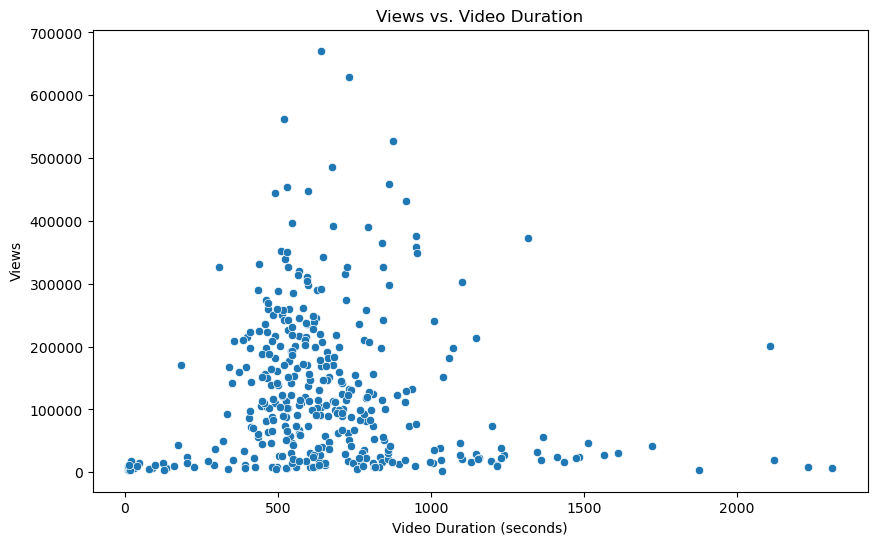

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Video Duration', y='Views', data=df)
plt.title('Views vs. Video Duration')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Views')
plt.show()

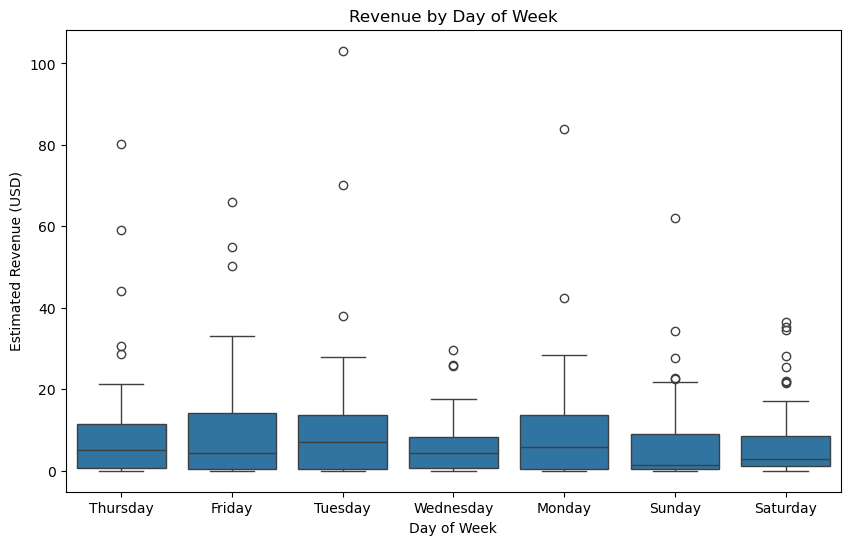

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Estimated Revenue (USD)', data=df)
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Estimated Revenue (USD)')
plt.show()

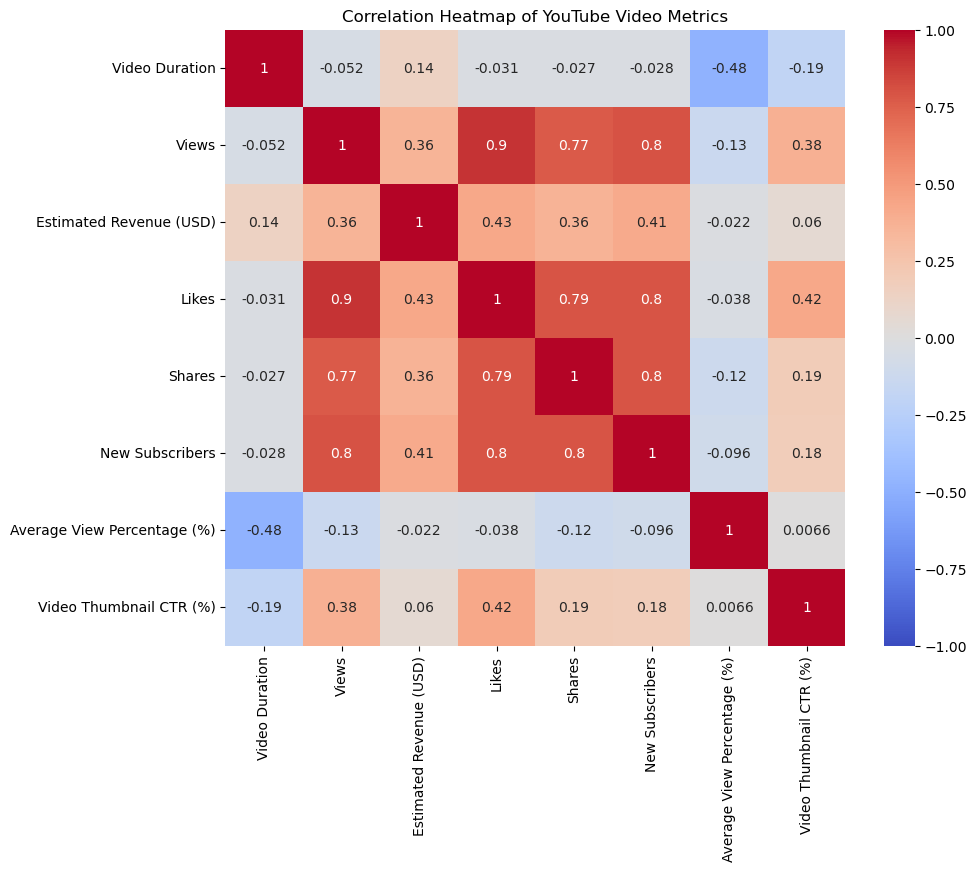

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update the file path if needed)
df = pd.read_csv('yt performance analytics.csv')

# Select key numeric columns to focus on (you can modify this list)
key_columns = [
    'Video Duration', 'Views', 'Estimated Revenue (USD)', 
    'Likes', 'Shares', 'New Subscribers', 
    'Average View Percentage (%)', 'Video Thumbnail CTR (%)'
]

# Filter the DataFrame to include only the selected columns
df_selected = df[key_columns]

# Ensure only numeric columns are used (in case any non-numeric slipped in)
numeric_df = df_selected.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of YouTube Video Metrics')
plt.show()

In [25]:
features = ['Video Duration', 'Views', 'Likes', 'Shares', 'New Subscribers']
target = 'Estimated Revenue (USD)'
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 83.74312201688316
R^2 Score: 0.03816828721371168


In [29]:
# Example: Video with 500s duration, 10000 views, 500 likes, 50 shares, 10 new subscribers
sample_video = [[500, 10000, 500, 50, 10]]
predicted_revenue = model.predict(sample_video)
print(f'Predicted Revenue: ${predicted_revenue[0]:.2f}')

Predicted Revenue: $2.02


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


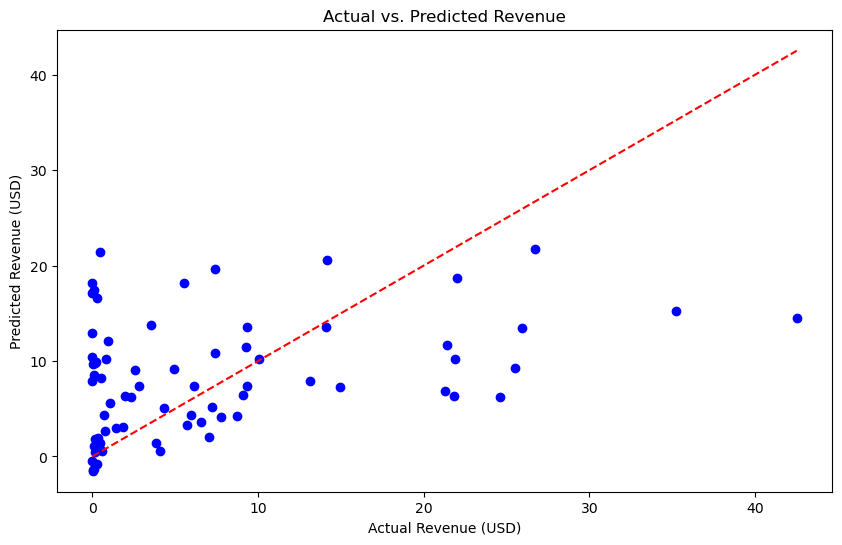

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs. Predicted Revenue')
plt.xlabel('Actual Revenue (USD)')
plt.ylabel('Predicted Revenue (USD)')
plt.show()

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

# Load the dataset
df = pd.read_csv('yt performance analytics.csv')

# Select features and target
features = ['Video Duration', 'Views', 'Likes', 'Shares', 'New Subscribers']
X = df[features]
y = df['Estimated Revenue (USD)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
# Optional: Use RandomForestRegressor for potentially better accuracy
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Save the model to a file
pickle.dump(model, open('revenue_model.pkl', 'wb'))

print("Model trained and saved as revenue_model.pkl")

Model trained and saved as revenue_model.pkl
